# **HW 2: Decision Trees and Overfitting**
**HW Due date is 03/04/2024, 1:59 pm**

Objective:
* To understand the basics of decision trees and Hunt's algorithm.
* To practice building decision trees using sample datasets.
* To visualize model performance and apply pre-pruning and post-pruning techniques to tackle overfitting issues.

In [8]:
# Import the neccesary libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating a Dataset:
Two class problem:

1400 instances of blue class
* 1000 instances generated from a Gaussian centered at (10,10)
* 400 noisy instances added

1400 instances of green class
* Generated from a uniform distribution in (0,20) coordinates

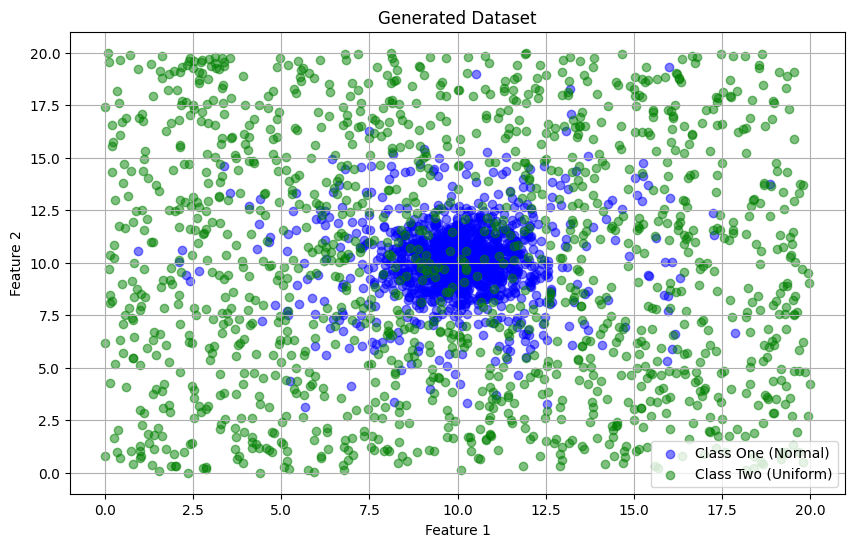

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate instances for class one using normal distribution
class_one_mean = (10, 10)  # Center around (10, 10)
class_one_std = 1
class_one_instances = 1000
class_one = np.random.normal(loc=class_one_mean, scale=class_one_std, size=(class_one_instances, 2))

# Generate noisy instances for class one
noisy_instances = 400
class_one_noisy = np.random.normal(loc=(0, 0), scale=3, size=(noisy_instances, 2))

# Generate instances for class two using uniform distribution in a [0,20] range]
class_two_instances = 1400
class_two = np.random.uniform(low=0, high=20, size=(class_two_instances, 2))

# Concatenate class one instances and noisy instances
X_class_one = np.vstack((class_one, class_one_noisy + class_one_mean))  # Adjusting mean to add noise
y_class_one = np.zeros(X_class_one.shape[0])  # Label for class one is 0

# Labels for class two are 1
X_class_two = class_two
y_class_two = np.ones(class_two.shape[0])

# Concatenate features and labels for both classes
X = np.vstack((X_class_one, X_class_two))
y = np.concatenate((y_class_one, y_class_two))


# Visualize the data
plt.figure(figsize=(10, 6))

# Plot instances for class one
plt.scatter(X_class_one[:, 0], X_class_one[:, 1], color='blue', label='Class One (Normal)', alpha=0.5)

# Plot instances for class two
plt.scatter(X_class_two[:, 0], X_class_two[:, 1], color='green', label='Class Two (Uniform)', alpha=0.5)

plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


The default values for the DecisionTreeClassifier in scikit-learn are as follows:

**criterion:** The function to measure the quality of a split. By default, it is set to 'gini', which measures the impurity of the split based on the Gini impurity criterion. Alternatively, you can set it to 'entropy' to use information gain.

**splitter:** The strategy used to choose the split at each node. By default, it is set to 'best', which chooses the best split. Alternatively, you can set it to 'random' to choose the best random split.

**max_depth:** The maximum depth of the tree. By default, it is set to 'None', meaning nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** The minimum number of samples required to split an internal node. By default, it is set to 2, meaning nodes with fewer than 2 samples are not split further.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. By default, it is set to 1, meaning nodes will continue to be split until each leaf node contains 1 sample.

**max_features:** The number of features to consider when looking for the best split. By default, it is set to 'None', meaning all features are considered.
random_state: The seed of the random number generator. By default, it is set to 'None'.

**max_leaf_nodes:** The maximum number of leaf nodes in the tree. By default, it is set to 'None', meaning unlimited number of leaf nodes.

**min_impurity_decrease:** A node will be split if this split induces a decrease of the impurity greater than or equal to this value. By default, it is set to 0.0.

**ccp_alpha:** Complexity parameter used for Minimal Cost-Complexity Pruning. By default, it is set to 0.0.

These are the primary parameters, but there are others as well, and you can refer to the scikit-learn documentation for more details.

**Coding Exersice:** Train a decisoin tree with default parameters from DecisionTreeClassifier in sklearn library. Show the accuracy results for both training and test sets.

Training accuracy: 1.0
Test accuracy: 0.8321428571428572


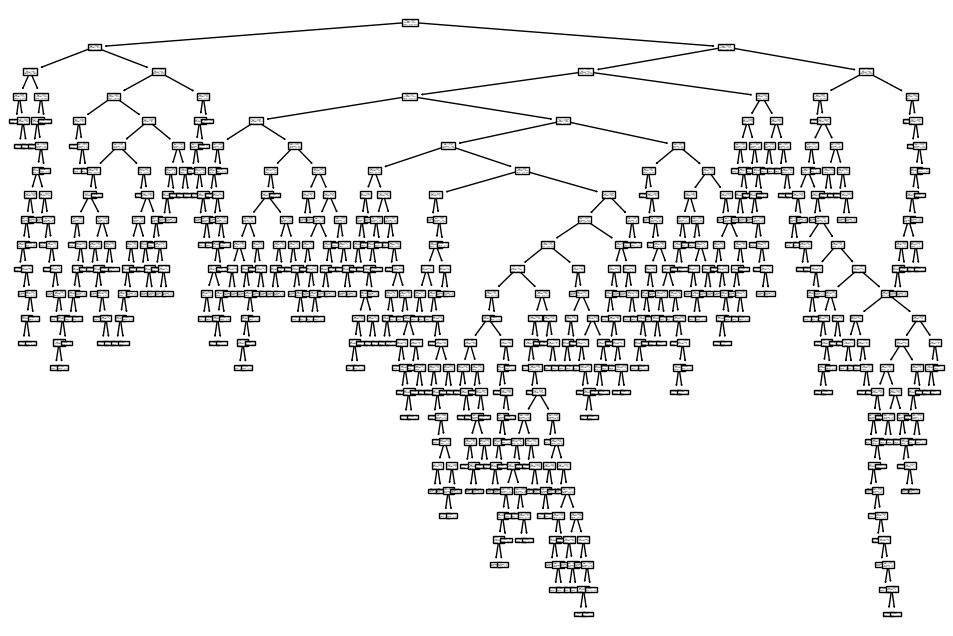

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#Your code ends here

# Train a decision tree classifier with default parameters
#You code starts here
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Your code ends here

# Evaluate the classifier on the training set
#You code starts here
y_train_prediction = tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_prediction)
print(f"Training accuracy: {train_accuracy}")

#Your code ends here

# Evaluate the classifier on the testing set
#You code starts here
y_test_prediction = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print(f"Test accuracy: {test_accuracy}")

#Your code ends here


# Visualize the learned tree
""" use plot_tree from sklearn.tree """
#You code starts here
plt.figure(figsize=(12, 8))
plot_tree(tree)
plt.show()

#Your code ends here

**Coding Exersice:** Perform sensitivity analysis over over $\textit{'max_depth'} $ hyperparameter for both training and test errors in the same figure. You need to calculate the errors for both sets.

Training error for max_depth(1): 0.3388392857142857
Test error for max_depth(1): 0.37857142857142856
Training error for max_depth(2): 0.17901785714285712
Test error for max_depth(2): 0.20714285714285718
Training error for max_depth(3): 0.14866071428571426
Test error for max_depth(3): 0.16428571428571426
Training error for max_depth(4): 0.11517857142857146
Test error for max_depth(4): 0.12857142857142856
Training error for max_depth(5): 0.11250000000000004
Test error for max_depth(5): 0.13214285714285712
Training error for max_depth(6): 0.09999999999999998
Test error for max_depth(6): 0.12142857142857144
Training error for max_depth(7): 0.09107142857142858
Test error for max_depth(7): 0.12678571428571428
Training error for max_depth(8): 0.08303571428571432
Test error for max_depth(8): 0.13749999999999996
Training error for max_depth(9): 0.06964285714285712
Test error for max_depth(9): 0.13571428571428568
Training error for max_depth(10): 0.05892857142857144
Test error for max_depth(10):

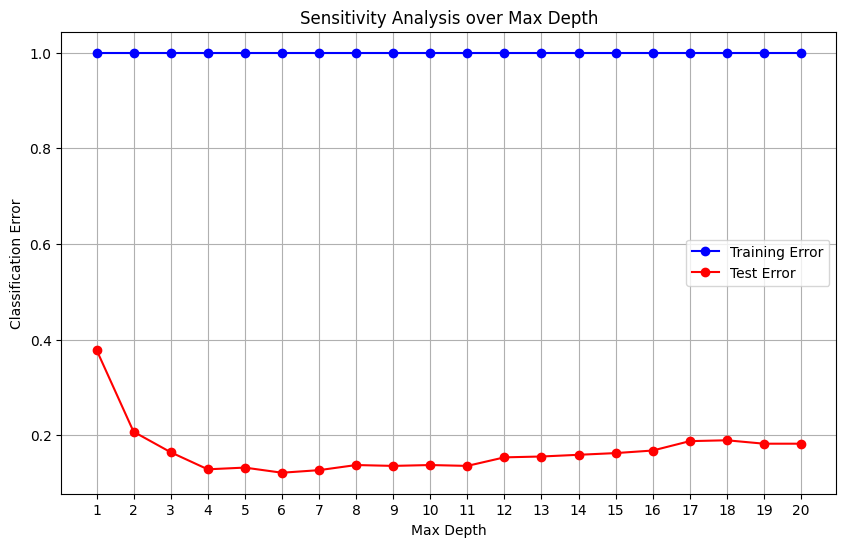

In [11]:
# Define the range of max_depth values to test
max_depth_values = range(1, 21)  # Test max_depth from 1 to 20

# Initialize lists to store training and test errors
training_errors = []
test_errors = []

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#Your code ends here

# Iterate over each max_depth value
#You code starts here
for max_depth in max_depth_values:
    # Train a decision tree classifier with the current max_depth value
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)

    # Evaluate the classifier on the training set
    y_train_prediction = tree.predict(X_train)
    train_error =  1 - accuracy_score(y_train, y_train_prediction)
    training_errors.append(train_accuracy)
    print(f"Training error for max_depth({max_depth}): {train_error}")

    # Evaluate the classifier on the test set
    y_test_prediction = tree.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_prediction)
    test_errors.append(test_error)
    print(f"Test error for max_depth({max_depth}): {test_error}")

#Your code ends here

# Plot the sensitivity analysis results

plt.figure(figsize=(10, 6))
#You code starts here
plt.plot(max_depth_values, training_errors, label='Training Error', color='blue', marker='o')
plt.plot(max_depth_values, test_errors, label='Test Error', color='red', marker='o')

#Your code ends here
plt.title('Sensitivity Analysis over Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Classification Error')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()



**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 20. Show the accuracy results for both training and test sets.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#Your code ends here

# Train a decision tree classifier with a maximum depth of 20
#You code starts here
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

#Your code ends here

# Evaluate the classifier on the training set
#You code starts here
y_train_prediction = tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_prediction)
print(f"Training accuracy: {train_accuracy}")

#Your code ends here

# Evaluate the classifier on the testing set
#You code starts here
y_test_prediction = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print(f"Test accuracy: {test_accuracy}")

#Your code ends here

Training accuracy: 0.9982142857142857
Test accuracy: 0.8178571428571428


**Question:** Do you see any gap between the accuracies of the training and test sets? If yes, what is the cause of this difference? Explain.

**Answer:** The differnece is overfitting. A depth of 20 is pretty large, so the tree is complex and the model overfits to the training data. Because of this, the model perofrms worse to unseen (test) data.

**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 4. Show the accuracy results for both training and test sets.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#You code ends here

# Train a decision tree classifier with a maximum depth of 4
#You code starts here
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

#You code ends here

# Evaluate the classifier on the training set
#You code starts here
y_train_prediction = tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_prediction)
print(f"Training accuracy: {train_accuracy}")

#You code ends here

# Evaluate the classifier on the testing set
#You code starts here
y_test_prediction = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_prediction)
print(f"Test accuracy: {test_accuracy}")

#You code ends here

Training accuracy: 0.8883928571428571
Test accuracy: 0.8714285714285714


**Question:** How is the gap now? Is your test set accuracy better? why is that? Explain.

**Answer:** The gap is smaller now because the training accuract decreased while the test accuracy increased. This happened because a higher depth caused overfitting. So the model was better fitted for the training, harming its performance on unseen data. Lowering the depth fixed this.

**Post-Pruning:** To apply post-pruning to the decision tree with 'max_depth' of 20, you can use the ccp_alpha parameter, which stands for Complexity Cost Pruning. This parameter controls the threshold for pruning. As the threshold increases, more nodes are pruned, leading to a simpler tree.

Here's how you can apply post-pruning with a maximum size of 20 using the DecisionTreeClassifier in scikit-learn:

Accuracy for ccp_alpha=0.0: 0.8267857142857142
Accuracy for ccp_alpha=0.0001245618632685786: 0.8321428571428572
Accuracy for ccp_alpha=0.00017857142857142833: 0.8339285714285715
Accuracy for ccp_alpha=0.0002976190476190476: 0.8267857142857142
Accuracy for ccp_alpha=0.0003348214285714286: 0.8232142857142857
Accuracy for ccp_alpha=0.0003348214285714286: 0.8232142857142857
Accuracy for ccp_alpha=0.0003348214285714286: 0.8303571428571429
Accuracy for ccp_alpha=0.0003348214285714286: 0.8232142857142857
Accuracy for ccp_alpha=0.0003571428571428571: 0.8321428571428572
Accuracy for ccp_alpha=0.0003571428571428571: 0.8303571428571429
Accuracy for ccp_alpha=0.0003571428571428571: 0.8267857142857142
Accuracy for ccp_alpha=0.00037202380952380956: 0.8321428571428572
Accuracy for ccp_alpha=0.00037202380952380956: 0.8267857142857142
Accuracy for ccp_alpha=0.00037202380952380956: 0.8321428571428572
Accuracy for ccp_alpha=0.00037202380952380956: 0.8303571428571429
Accuracy for ccp_alpha=0.0003826530612

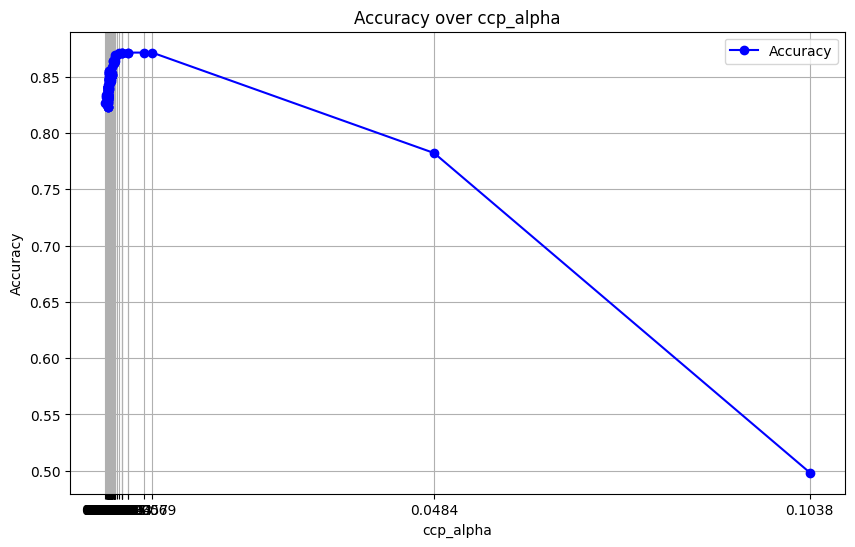

Max accuracy 0.8714285714285714 with ccp_alpha of 0.006913172837497782


In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#You code ends here

# Train a decision tree classifier with a maximum size of 20
""" You can use the same code as before. You have already trained this model."""
#You code starts here
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

#You code ends here

# Apply post-pruning with different ccp_alpha values
""" use tree_clf.cost_complexity_pruning_path , then capture ccp_alphas """
#You code starts here
ccp_path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas

#You code ends here

# Initialize lists to store accuracy scores
accuracy_scores = []
acc_and_alpha = []

# Iterate over different ccp_alpha values and retrain the decision tree and print out the accuracy of the retrained model
#You code starts here
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(max_depth=20, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    y_test_prediction = pruned_tree.predict(X_test)
    accuracy_pruned = accuracy_score(y_test, y_test_prediction)
    accuracy_scores.append(accuracy_pruned)
    acc_and_alpha.append((accuracy_pruned, ccp_alpha))
    print(f"Accuracy for ccp_alpha={ccp_alpha}: {accuracy_pruned}")

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores, label='Accuracy', color='blue', marker='o')


plt.title('Accuracy over ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.xticks(ccp_alphas)
plt.grid(True)
plt.legend()
plt.show()
print(f"Max accuracy {max(acc_and_alpha)[0]} with ccp_alpha of {max(acc_and_alpha)[1]}")

#You code ends here

**Question:** How the accuracy is changing with respect to different values of 'ccp_alpha'? What is the best accuracy you get? Isn't that close to the accuracy you had for 'max_depth' of 4 ? why this happened (i.e., accuracy imporved for the model with 'max_depth' of 20 after post-pruning)?

**Answer:** Initially, the accuracy improves sharply as ccp_alpha increases. Then, it levels off before beginning to decline with ccp_alpha. The best accuracy I got was 0.88. This was close to max_depth of 4 result. This happened because the tree was too large before the prunning, so the model was overfitted. As ccp_alpha increased (more prunning) the model became less overfit. This probably occured until the model became around the same size as mex depth of 4. After, that ccp_alpha got too large and prunned too much, causing underfitting and the accuracy to drop.